# An introduction to Monte Carlo methods

The corresponding notebooks are here: [github repository](https://github.com/mferrero/jouvence_2024/tree/master/notebooks) and
[docker](https://mybinder.org/v2/gh/mferrero/jouvence_2024/HEAD)


<br>
<br>
<div style="text-align: right"> Michel Ferrero</div>
<div style="text-align: right"> Summer School on Computational Quantum Materials</div>
<div style="text-align: right"> Jouvence, May 23, 2024</div>


# Outline

- [Introduction to Monte Carlo](01-intro_monte_carlo.slides.html)

- [Newton–Cotes quadrature](02-newton_cotes.slides.html)
  
- [Importance sampling](03-importance_sampling.slides.html)

- [Direct sampling methods](04-direct_sampling.slides.html)

- [Markov chain sampling and balance condition](05-markov_chain.slides.html)

- [Metropolis-Hastings algorithm](06-metropolis_hastings.slides.html)

- [The two-dimensional Ising model](07-ising.slides.html)

- [Error bar analysis](08-error_analysis.slides.html)
  
- [References](09-references.slides.html)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('style.mpl')

# Motivation

- Physical systems are often described by a very large number of degrees of freedom.

- Obtaining information, such as the partition function, in principle requires to compute
  a sum over all of them.

- In most cases, this is very difficult! Example: Ising model with $N$ spins, the
  sum has $2^N$ terms.

- Monte Carlo methods allow to circumvent this difficulty using a stochastic approach.

# The birth of computational Monte Carlo

- What are the chances to win a *Solitaire* game?

- Rather than trying to solve the complex combinatorial problem,
  Ulam thought he could play 100 times and have an idea of the result from the statistics.
  
- With the appearance of first computers this gave birth to the first Monte Carlo algorithms.
    
<table>
    <tr>
      <td> <img src="figures/stanislaw_ulam.jpg" alt="Drawing" style="height: 250px;"/> </td>
      <td> <img src="figures/john_von_neumann.jpg" alt="Drawing" style="height: 250px;"/> </td>
    </tr>
    <tr>
        <td><center>Stanislaw Ulam</center></td> <td><center>John von Neumann</center></td>
    </tr>
</table>

# Monte Carlo for integration

- Underlying principle in Monte Carlo methods: *In order to gain information about a system
  that depends on many degrees of freedom, it is enough to inspect a subset of cleverly chosen
  representatives*.
  
- These representatives are generated by a *stochastic process*.

- Monte Carlo methods are now widely used in modern computational physics. They exist in
  many different flavours.
    
- We will be interested in **Monte Carlo integration**


# Example: Computing $\pi$ with pebbles

- How can we stochastically estimate $\pi$? We can obtain it from
  \begin{equation*}
    \pi = 4 \, \frac{A_\mathrm{circle}}{A_\mathrm{square}}
  \end{equation*}

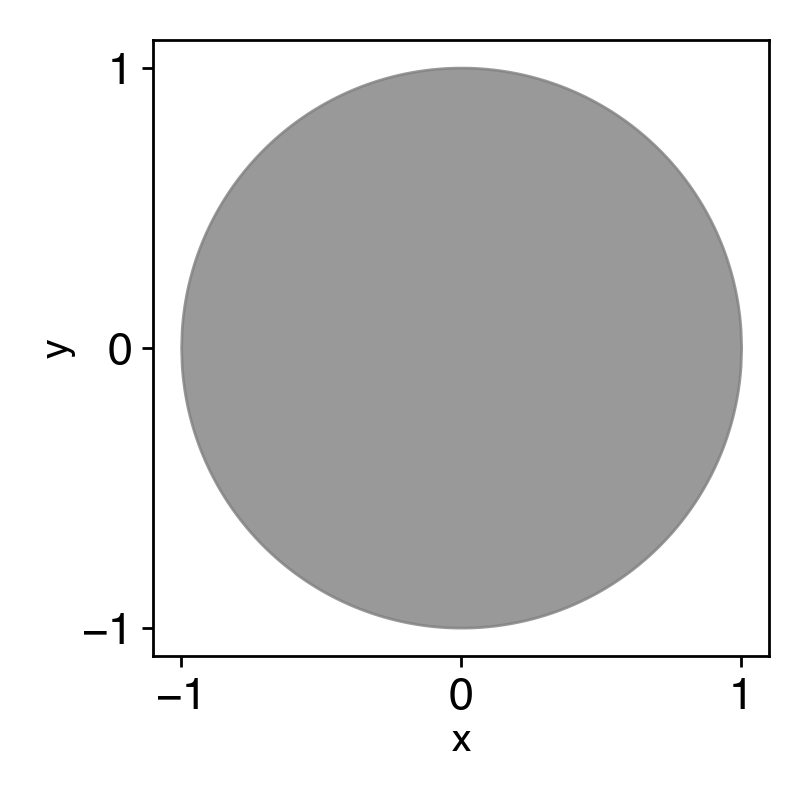

In [2]:
fig, ax = plt.subplots(figsize=(4,4))

cx = np.linspace(-1, 1, 1000)
cy = np.sqrt(1 - cx**2)
ax.fill_between(cx, -cy, cy, color='gray', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xticks([-1,0,1]);
ax.set_yticks([-1,0,1]);
ax.set_aspect('equal')

# Uniform sampling over the square

- Throw pebbles uniformly in $[-1,1]^2$. The ratio between pebbles inside the circle and
  the total number of pebbles is an estimate of $A_\mathrm{circle} / A_\mathrm{square}$.
  Then $\pi \simeq 4 N_\mathrm{inside} / N_\mathrm{total}$

In [3]:
n_pebbles = 2**12
pebbles = np.random.uniform(-1, 1, size=(2, n_pebbles))
n_inside = np.sum(np.linalg.norm(pebbles, axis=0) < 1)
print(f"inside: {n_inside}, total: {n_pebbles}, π ≃ {4*n_inside/n_pebbles}")

inside: 3212, total: 4096, π ≃ 3.13671875


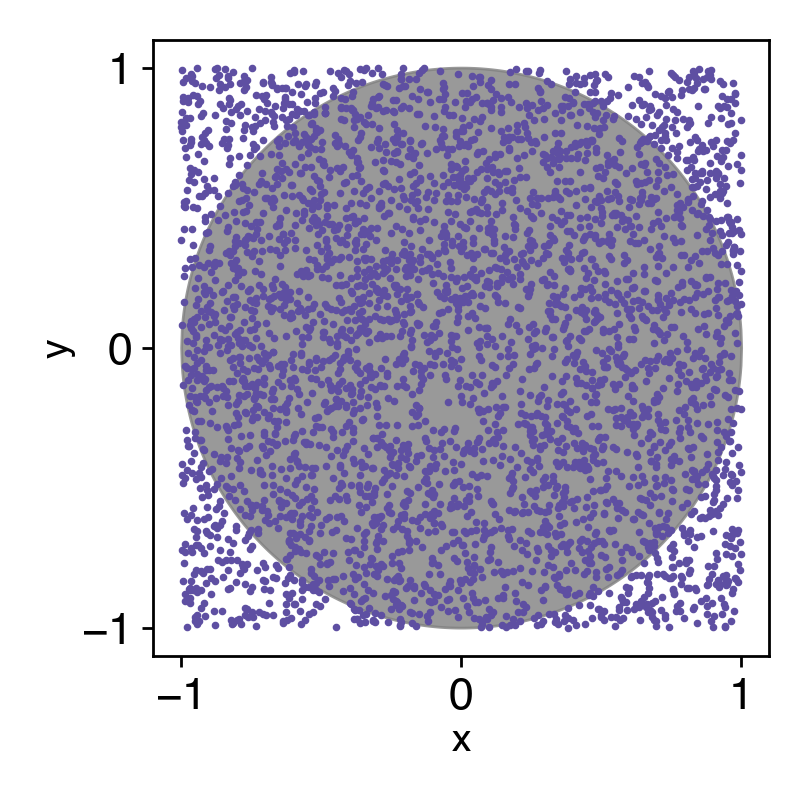

In [4]:
fig, ax = plt.subplots(figsize=(4,4))

cx = np.linspace(-1, 1, 1000)
cy = np.sqrt(1 - cx**2)

ax.fill_between(cx, -cy, cy, color='gray', alpha=0.8)
ax.scatter(*pebbles, s=3, alpha=1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xticks([-1, 0, 1]);
ax.set_yticks([-1, 0, 1]);
ax.set_aspect('equal')

# What have we done?

- Throwing the $n^\mathrm{th}$ pebble is described by a random variable

  \begin{equation*}
    x_n =
    \begin{cases}
    4 \quad \text{with probability} \quad \pi/4 \\
    0 \quad \text{with probability} \quad (1-\pi/4)
    \end{cases}
  \end{equation*}
  
- The average of $x_n$ is

  \begin{equation*}
    \langle x_n \rangle = \frac{\pi}{4} \cdot 4 + \left(1-\frac{\pi}{4}\right) \cdot 0 = \pi
  \end{equation*}
  
- We have traded an integration for the computation of an average value.

# Integration of multivariable functions

- Can a similar strategy be used to compute integrals of multivariable functions?

- How does this approach compare to standard quadrature methods?

- How should the stochastic sampling be done?

# Outline
    
- [Introduction to Monte Carlo](01-intro_monte_carlo.slides.html)

- [Newton–Cotes quadrature](02-newton_cotes.slides.html)
  
- [Importance sampling](03-importance_sampling.slides.html)

- [Direct sampling methods](04-direct_sampling.slides.html)

- [Markov chain sampling and balance condition](05-markov_chain.slides.html)

- [Metropolis-Hastings algorithm](06-metropolis_hastings.slides.html)

- [The two-dimensional Ising model](07-ising.slides.html)

- [Error bar analysis](08-error_analysis.slides.html)
  
- [References](09-references.slides.html)